<h2>
<center>
<b>
<i>
Universidad Nacional de Colombia Sede Bogotá
<center>
Análisis Numérico 2021-1
<center>
Tarea computacional Sistemas Lineales

**De La Hoz Luengas, Víctor Andrés** \\
**Matrícula 9 de MATEMÁTICAS**

*A continuación se presentan las librerías necesarias para la solución de los ejercicios, junto con los métodos implementados necesarios. Los métodos usados se tomaron a partir de los presentados en el colab creado por el profesor Juan Galvis.*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import scipy.io as io
from scipy.linalg import hilbert
import scipy.sparse as sp
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
import pprint
import urllib.request
import pandas as pd
from sympy import Matrix

## **Problema 1**
Considere la matriz de segundas diferencias $A$ definida por 

$$a_{ij}=\left\{\begin{array}{cl}
-2, & i=j,\\
1, & |j-i|=1,\\
0, & |j-i|>1.
\end{array} \right.$$

Considere tambien la matriz de Frank de dimension $n\times n$, 

$$
A=\left(\begin{array}{cccccccccc}
n & n-1 & n-2 & n-3 & n-4& \dots 1\\
n-1 & n-1 &n-2 &n-3 & n-4 &\dots 1\\
0 & n-2 & n-2 & n-3 & n-4 & \dots 1\\
0&0&n-3 &n-3 & n-4&\dots 1 \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right)
$$


Note que en la diagonal principal, es decir, la diagonal 0 tenemos los números $n,n-1,\dots,1$, en la diagonal $1$ y $-1$ tenemos $n-1,n-2,\dots,1$. En la diagonal $k>1$ tenemos $n-k,n-k-1,\dots,1$ y en la diagonal $-k$ con $k>1$ tenemos entradas nulas. Esta matriz es un ejemplo de matriz de Hessenberg.

**1.** ¿Qué propiedades puede listar de las matrices de segundas diferencias y de Frank?

###<font color='red'><center><h2><b>*Solución*</font>

*En primer lugar, considere el siguiente código que genera la matriz de segundas diferencias de orden n*

In [ ]:
# Función para crear una matriz de segundas diferencias de orden n:
def secdif(n):
  A = np.zeros((n,n))
  for i in range(0,n):
    for j in range(0,n):
      if i == j:
        A[i,j] = -2
      elif np.abs(j-i) == 1:
        A[i,j] = 1
  return A

*En segundo lugar, considere este código para una matriz de Frank de orden n*

In [ ]:
# Función para crear matriz de Frank de orden n:
def frank(n):
  A = np.zeros((n,n))
  A[0,0] = n
  for i in range(0,n):
    for j in range(0,n):
      if i == j:
        A[i,j] = n-i
      elif j-i == 1:
        A[i,j] = n-i-1
      elif i-j == 1:
        A[i,j] = n-j-1
      elif j > i:
        A[i,j] = n-j
  return A

*Las propiedades para estas dos matrices son, por definición:*

*   Diagonial Dominante
*   Simétrica

*Y como las entradas en sus diagonales son positivas, también son Definidas Postivas.*


*Ahora, las siguientes propiedades se pueden comprobar por medio de operaciones:*

In [ ]:
# Hermitianas

# Matriz de segundas diferencias
print('A=', secdif(5))
print('\n (A^T)*=', np.matrix.conjugate(np.matrix.transpose(secdif(5))))

# Matriz de Frank
print('\n \n A=', frank(5))
print('\n (A^T)*=', np.matrix.conjugate(np.matrix.transpose(frank(5))))

A= [[-2.0000  1.0000  0.0000  0.0000  0.0000]
 [ 1.0000 -2.0000  1.0000  0.0000  0.0000]
 [ 0.0000  1.0000 -2.0000  1.0000  0.0000]
 [ 0.0000  0.0000  1.0000 -2.0000  1.0000]
 [ 0.0000  0.0000  0.0000  1.0000 -2.0000]]

 (A^T)*= [[-2.0000  1.0000  0.0000  0.0000  0.0000]
 [ 1.0000 -2.0000  1.0000  0.0000  0.0000]
 [ 0.0000  1.0000 -2.0000  1.0000  0.0000]
 [ 0.0000  0.0000  1.0000 -2.0000  1.0000]
 [ 0.0000  0.0000  0.0000  1.0000 -2.0000]]

 
 A= [[ 5.0000  4.0000  3.0000  2.0000  1.0000]
 [ 4.0000  4.0000  3.0000  2.0000  1.0000]
 [ 0.0000  3.0000  3.0000  2.0000  1.0000]
 [ 0.0000  0.0000  2.0000  2.0000  1.0000]
 [ 0.0000  0.0000  0.0000  1.0000  1.0000]]

 (A^T)*= [[ 5.0000  4.0000  0.0000  0.0000  0.0000]
 [ 4.0000  4.0000  3.0000  0.0000  0.0000]
 [ 3.0000  3.0000  3.0000  2.0000  0.0000]
 [ 2.0000  2.0000  2.0000  2.0000  1.0000]
 [ 1.0000  1.0000  1.0000  1.0000  1.0000]]


In [ ]:
# Invertibles

print('El determinante de la matriz de segundas diferencias de orden 5 es ', la.det(secdif(5)))
print('El determinante de la matriz de Frank de orden 5 es ', la.det(frank(5)))

El determinante de la matriz de segundas diferencias de orden 5 es  -6.0
El determinante de la matriz de Frank de orden 5 es  1.0000000000000033


**2.** Investigue como medir el tiempo de ejecución de un comando en python o MatLab y  calcule el tiempo de resolver un sistema  $Ax=b$ con $A$ una matriz de segundas diferencias de segundo orden de dimension $n=2,4,8,1,32,64,128,\dots$. Tome  $b=(1,1,\dots,1)^T.$

###<font color='red'><center><h2><b>*Solución*</font>

*El comando que se usará para calcular el tiempo de ejecucuión en Python es el siguiente:*

In [ ]:
import time
start_time = time.time()
print("Tiempo para resolver una matriz de () de orden","es %s segundos" % (time.time() - start_time))

Tiempo para resolver una matriz de () de orden es 5.91278076171875e-05 segundos


*Por lo tanto, para la matriz de segundas diferencias, tenemos:*

In [ ]:
# Ciclo para poder asignar cada orden y evaluar el tiempo de resolucion del sistema
for i in range(0,10):
  start_time = time.time()
  x = la.solve(secdif(2**i), np.ones(2**i))
  print("Tiempo para resolver una matriz de segundas diferencias de orden ",2**i," es %s segundos" % (time.time() - start_time))


Tiempo para resolver una matriz de segundas diferencias de orden  1  es 0.0012764930725097656 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  2  es 0.0003314018249511719 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  4  es 0.0002548694610595703 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  8  es 0.0003275871276855469 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  16  es 0.00194549560546875 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  32  es 0.003947019577026367 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  64  es 0.010005474090576172 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  128  es 0.03633999824523926 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  256  es 0.14086413383483887 segundos
Tiempo para resolver una matriz de segundas diferencias de orden  512  es 

**3.** Repita con la matriz de Frank.

###<font color='red'><center><h2><b>*Solución*</font>

*Para la matriz de Frank, se consideró un orden máximo de $n=16$, puesto que apartir del orden $n=32$ se obtiene un mensaje de alerta como este:*

In [ ]:
x = la.solve(frank(32), np.ones(32))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=4.16341e-19): result may not be accurate.
  """Entry point for launching an IPython kernel.


*Lo que afecta el método de solución y por lo tanto su tiempo de ejecucuión, así:*

In [ ]:
# Ciclo para poder asignar cada orden y evaluar el tiempo de resolucion del sistema
for i in range(0,5):
  start_time = time.time()
  x = la.solve(frank(2**i), np.ones(2**i))
  print("Tiempo para resolver una matriz de Frank de orden ",2**i," es %s segundos" % (time.time() - start_time))

Tiempo para resolver una matriz de Frank de orden  1  es 0.000579833984375 segundos
Tiempo para resolver una matriz de Frank de orden  2  es 0.0009067058563232422 segundos
Tiempo para resolver una matriz de Frank de orden  4  es 0.00019073486328125 segundos
Tiempo para resolver una matriz de Frank de orden  8  es 0.000209808349609375 segundos
Tiempo para resolver una matriz de Frank de orden  16  es 0.000331878662109375 segundos


**4.** Repita con la matriz de Hilbert.

###<font color='red'><center><h2><b>*Solución*</font>

*Para la matriz de Hilbert, se consideró un orden máximo de $n=8$, puesto que apartir del orden $n=16$ se obtiene un mensaje de alerta como este:*

In [ ]:
x = la.solve(hilbert(16), np.ones(16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=1.1839e-19): result may not be accurate.
  """Entry point for launching an IPython kernel.


*Lo que afecta el método de solución y por lo tanto su tiempo de ejecucuión, así:*

In [ ]:
# Ciclo para poder asignar cada orden y evaluar el tiempo de resolucion del sistema
for i in range(0,4):
  start_time = time.time()
  x = la.solve(hilbert(2**i), np.ones(2**i))
  print("Tiempo para resolver una matriz de Hilbert de orden ",2**i," es %s segundos" % (time.time() - start_time))

Tiempo para resolver una matriz de Hilbert de orden  1  es 0.0014739036560058594 segundos
Tiempo para resolver una matriz de Hilbert de orden  2  es 0.00029969215393066406 segundos
Tiempo para resolver una matriz de Hilbert de orden  4  es 0.00023603439331054688 segundos
Tiempo para resolver una matriz de Hilbert de orden  8  es 0.0002009868621826172 segundos


## **Problema 2**
Considere la matriz de Hilbert $H(n)$ con $n=4,5,6,\dots$.

**1.** Para $n=5,6,7,\dots$ calcule $\lambda(n)$ el menor valor propio de $H(n)$. Grafique este vector.

###<font color='red'><center><h2><b>*Solución*</font>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


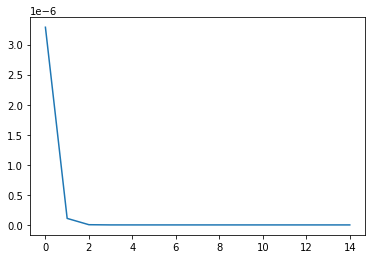

In [ ]:
# Se crea una lista vacía en la que se colocarán los menores valores propios
mineig = []

# Se crea un ciclo para llenar la lista con los menores valores propios de la matriz de Hilbert del respectivo orden
for i in range(5,20):
  mineig.append(min(la.eig(hilbert(i))[0]))

# Se grafica el vector
plt.plot(mineig)

**2.**   En clase vimos que al intentar hacer a factorización de Cholesky de $H(20)$ en Octave la factorización no fue completada llevando a la conclución de que la representación numérica de $H(20)$ no es definida positiva. Apareció el error 
```
# error: chol : imput matrix must be positive definite
```
Verifique teoricamente si $H(n)$ es en realidad positiva definida (no necesita mostrar detalles aqui). Con ayuda del gráfico anterior y de lo estudiado sobre artimética de punto flotante explique esta situación.

###<font color='red'><center><h2><b>*Solución*</font>

*Considere la definición de la matriz de Hilbert como*

$$
H(n)=[h_{ij}]=\begin{bmatrix} \dfrac 1 {i + j - 1} \end{bmatrix}
$$

*Tome $X\in\mathcal{M}_{n,1}(\mathbb{R})$, entonces como $H$ es simétrica:*

$$
{}^tXHX=\sum_{1\leq i,j\leq n}\frac{x_ix_j}{i+j-1}=\sum_{1\leq i,j\leq n}x_ix_j\int_0^1t^{i+j-2}dt=\int_0^1\left(\sum_{i=1}^nx_it^{i-1}\right)^2dt>0
$$


*Ahora, el código de error que se genera en Python, es el siguiente:*

In [ ]:
la.cholesky(hilbert(20))

LinAlgError: ignored

*A partir del orden 14 se obtiene este error. Esto debido a la precisión de máquina con la que ejecuta las operacines Python, recordemos que cuando $n$ aumenta, el valor de la entrada en la matriz de Hilbert es muy pequeño, eventualmente 0 para la máquina, de manera que al momento de realizar la operación correspondiente a:*

$$
\begin{eqnarray*}
l_{kk} &=& \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}\\
l_{ik} &=& \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right), i > k
\end{eqnarray*}
$$

*se genera el error.*

**3.** Calcule $R(n)$ de la factorización de Cholesky de $H(n)=R(n)^TR(n)$ con $n=4,5,\dots$. Presente un gráfico de $t(n)=tr(R(n))$ como evidencia del cálculo.

###<font color='red'><center><h2><b>*Solución*</font>

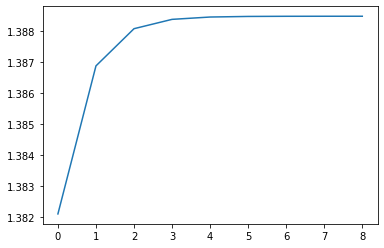

In [ ]:
# Se crea una lista vacía en la que se colocarán los valores de la traza
traR = []

# Se crea un ciclo para llenar la lista con los menores valores propios de la matriz de Hilbert del respectivo orden
for i in range(4,13):
  traR.append(np.matrix.trace(la.cholesky(hilbert(i))))

# Se grafica el vector
plt.plot(traR)

## **Problema 3**
Considere la matriz de Hilbert $H(n)$ con $n=4,5,\dots,20$. Existe una fórmula exacta para la inversa de $H(n)$, implemente esta fórmula. Con el comando de MatLab o Python para calcular la inversa calcule $G=inv(H(n))$. Compare y comente los resultados.

###<font color='red'><center><h2><b>*Solución*</font>

In [ ]:
# Se define la funcion para calcular la inversa de la matriz de Hilbert
from math import factorial as ft
def invHilbert(n):
    Hinv = np.empty((n, n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            Hinv[i-1, j-1] = (((-1)**(i+j))*(ft(i+n-1))*(ft(j+n-1)))/(((ft(i-1))**2)*((ft(j-1))**2)*(ft(n-j))*(ft(n-i))*(i+j-1))
    return Hinv

# Para poder comparar los resultados, se compararn los tiempos de ejecución

# Metodo implementado
for i in range(4,20):
  start_time = time.time()
  invHilbert(i)
  print("Tiempo para calcular la inversa de la matriz de Hilbert de orden", i, " con el método implementado: % segundos" % (time.time() - start_time))

print("\n")
# Metodo de Python
for i in range(4,20):
  start_time = time.time()
  la.invhilbert(i)
  print("Tiempo para calcular la inversa de la matriz de Hilbert de orden", i, " con el método de Python: % segundos" % (time.time() - start_time))


Tiempo para calcular la inversa de la matriz de Hilbert de orden 4  con el método implementado: 5.698204040527344e-05egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 5  con el método implementado: 7.295608520507812e-05egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 6  con el método implementado: 7.462501525878906e-05egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 7  con el método implementado: 0.00010442733764648438egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 8  con el método implementado: 0.0001380443572998047egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 9  con el método implementado: 0.00019073486328125egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 10  con el método implementado: 0.00021886825561523438egundos
Tiempo para calcular la inversa de la matriz de Hilbert de orden 11  con el método implementado: 0.0002770423889160156egundo

*Resulta curioso, por demás, que el método implementado sea el que se ejecute más rápido, ahora, para vereificar esto, comparemos dos resultados de la inversa de la matriz de Hilbert:*

In [ ]:
invHilbert(4)

array([[ 16.0000, -120.0000,  240.0000, -140.0000],
       [-120.0000,  1200.0000, -2700.0000,  1680.0000],
       [ 240.0000, -2700.0000,  6480.0000, -4200.0000],
       [-140.0000,  1680.0000, -4200.0000,  2800.0000]])

In [ ]:
la.invhilbert(4)

array([[ 16.0000, -120.0000,  240.0000, -140.0000],
       [-120.0000,  1200.0000, -2700.0000,  1680.0000],
       [ 240.0000, -2700.0000,  6480.0000, -4200.0000],
       [-140.0000,  1680.0000, -4200.0000,  2800.0000]])

## **Problema 4.1**
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015. Gráfique el patrón de dispersión de esta matriz. Liste (con justificación numérica) las propiedades de esta matriz. 

###<font color='red'><center><h2><b>*Solución*</font>

*Por cuestiones de capacidad computacoinal, y garantizando la solución del sistema en la siguiente sección, escogí la matriz en https://suitesparse-collection-website.herokuapp.com/mat/Norris/fv1.mat*

In [ ]:
import requests
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/Norris/fv1.mat"
file = requests.get(url, allow_redirects=True)

open('fv1.mat', 'wb').write(file.content)

80938

<class 'numpy.ndarray'>


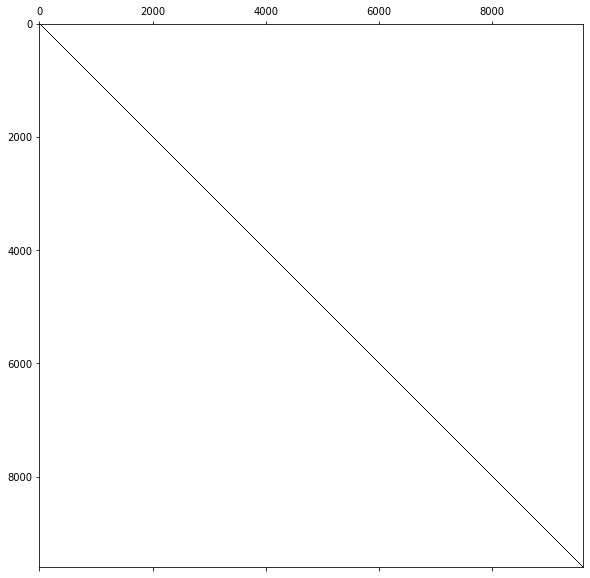

In [ ]:
mat = io.loadmat('fv1.mat')
#print(mat)
A = mat['Problem']['A']
B = A[0]
C = B[0]
D = sp.csr_matrix.toarray(C)
print(type(D))
plt.figure(figsize=(10, 10))
plt.spy(D)
plt.show()

*Algunas de las propiedades de esta matriz son:*

## **Problema 4.2**
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015. Use un método iterativo (diferente de Jacobi) para resolver el sistema $Ax=b$
con $b=(1,1,\dots,1)$. 

###<font color='red'><center><h2><b>*Solución*</font>

*Por cuestiones de capacidad computacoinal, escogí la matriz en https://suitesparse-collection-website.herokuapp.com/mat/Norris/fv1.mat*

In [ ]:
import requests
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/Norris/fv1.mat"
file = requests.get(url, allow_redirects=True)

open('fv1.mat', 'wb').write(file.content)

80938

In [ ]:
mat = io.loadmat('fv1.mat')
A = np.array(sp.csr_matrix.toarray(((mat['Problem']['A'])[0])[0]))

*Para poder realizar este ejercicio, se consideraron muchas matrices sin éxito en la convergencia del método. Por esto, primero tomé el mismo código realizado por el profesor para verificar sí se tenía o no la convergencia, posteriormente plantée una función que permitiera resolver el sistema pero con el método de Gaus-Seidel. No obstante, el tiempo de ejecución, fue muy demorado, por lo que decidí dejar este código con el método de Jacobi e interrumpir el procedimiento del método de Gauss-Seidel.*

In [ ]:
def jacobisolver(A,b,tol,Maxiter=25,x=None):
    # x inicial en caso no se tenga                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))
    #A=D-L-U y R=A-D=-L-U;                                                                                                                                                                
    D = np.diag(A)

    #Interation                                                                                                                                                                          
    for i in range(Maxiter):
        r=b-np.dot(A,x)
        nr=la.norm(r)
        print('norm(r(',i,'))=',nr)
        if nr<tol:
          break        
        delta=r/D
        x = x+delta
    return x

b = np.ones(len(A))
guess = np.ones(len(A))
sol = jacobisolver(A,b,0.00001,Maxiter=100,x=guess)

print("A:")
print(A)

print("b:")
print(b)

print ("x:")
print(sol)

norm(r( 0 ))= 48.14227740822836
norm(r( 1 ))= 39.444101272150554
norm(r( 2 ))= 33.48799383058759
norm(r( 3 ))= 28.51089628887762
norm(r( 4 ))= 24.28941656407532
norm(r( 5 ))= 20.698429963979926
norm(r( 6 ))= 17.64098447174745
norm(r( 7 ))= 15.036774457971074
norm(r( 8 ))= 12.818114914859821
norm(r( 9 ))= 10.927634216154486
norm(r( 10 ))= 9.316595097406218
norm(r( 11 ))= 7.943552895513094
norm(r( 12 ))= 6.773244698366487
norm(r( 13 ))= 5.775656648732947
norm(r( 14 ))= 4.925236062796101
norm(r( 15 ))= 4.200223949745486
norm(r( 16 ))= 3.5820886610958467
norm(r( 17 ))= 3.055044904714076
norm(r( 18 ))= 2.605645005514372
norm(r( 19 ))= 2.222431404528784
norm(r( 20 ))= 1.8956411168619134
norm(r( 21 ))= 1.6169543060597327
norm(r( 22 ))= 1.3792803361086958
norm(r( 23 ))= 1.1765756749645473
norm(r( 24 ))= 1.0036888777991229
norm(r( 25 ))= 0.8562286001227792
norm(r( 26 ))= 0.730451201873952
norm(r( 27 ))= 0.6231650210440621
norm(r( 28 ))= 0.531648834069108
norm(r( 29 ))= 0.4535823923121078
norm(r

In [ ]:
def gseidsolver(A,b,tol,Maxiter=25,x=None):
    # x inicial en caso no se tenga                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))
    #A=D-L-U y R=A-D=-L-U;                                                                                                                                                                
    Q = np.tril(A)

    #Interation                                                                                                                                                                          
    for i in range(Maxiter):
        r = b - np.dot(A,x)
        nr = la.norm(r)
        print('norm(r(',i,'))=',nr)
        if nr < tol:
          break        
        delta = np.dot(la.inv(Q), r)
        x = x + delta
    return x

b = np.ones(len(A[0]))
guess = np.ones(len(A[0]))
sol = gseidsolver(A, b, 0.00001, Maxiter=1000, x = guess)

print("A:")
print(A)

print("b:")
print(b)

print ("x:")
print(sol)

norm(r( 0 ))= 48.14227740822836
norm(r( 1 ))= 34.3803885278264
norm(r( 2 ))= 25.452524680553307
norm(r( 3 ))= 18.892634519045945
norm(r( 4 ))= 14.031166070431754
norm(r( 5 ))= 10.423350839097669
norm(r( 6 ))= 7.744635888146763
norm(r( 7 ))= 5.755206082105732
norm(r( 8 ))= 4.2773848877538105
norm(r( 9 ))= 3.179411943534126
norm(r( 10 ))= 2.3635288674085566
norm(r( 11 ))= 1.7571793852333895
norm(r( 12 ))= 1.3064970798531852


## **Problema 5** 
Considere la matriz https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015.  ¿Qué puede decir del problema asociado a esta matriz? 

###<font color='red'><center><h2><b>*Solución*</font>

*Por cuestiones de capacidad computacoinal, escogí la matriz en https://suitesparse-collection-website.herokuapp.com/mat/HB/jagmesh9.mat*

In [ ]:
import requests
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/HB/jagmesh9.mat"
file = requests.get(url, allow_redirects=True)

open('jagmesh9.mat', 'wb').write(file.content)

11781

*Considere su patrón de dispersión:*

<class 'numpy.ndarray'>


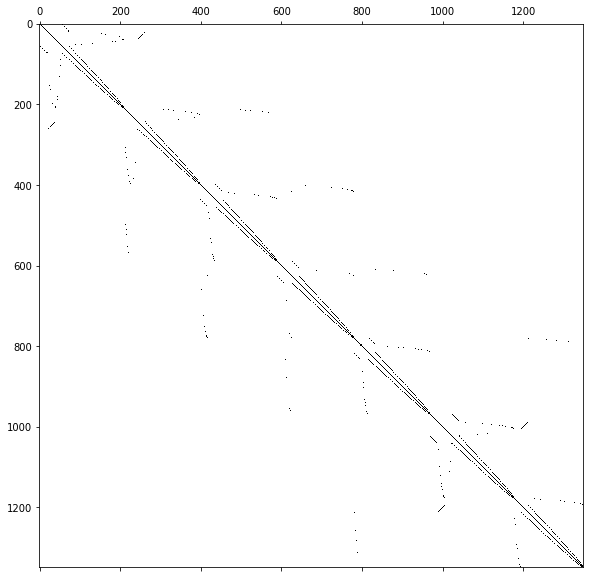

In [ ]:
mat = io.loadmat('jagmesh9.mat')
#print(mat)
A = mat['Problem']['A']
B = A[0]
C = B[0]
D = sp.csr_matrix.toarray(C)
print(type(D))
plt.figure(figsize=(10, 10))
plt.spy(D)
plt.show()

*El problema asociado a esta matriz corresponde a uno de los problemas propuestos en el libro ACM Transactions on Mathematical Software, en la sección de matrices dispersas. No logré acceder al libro pero parece que se creó una librería completa de matrices dispersas para la implementación de diferentes algoritmos y esta particularmente en el proceso de transoformaciones de formato de imagen de 2D a 3D.*

## **Referencias**

*   Kincaid, D., & Cheney, W. (2021). Numerical Analysis: Mathematics of Scientific Computing (The Sally Series; Pure and Applied Undergraduate Texts, Vol. 2) (3rd Revised edition). American Mathematical Society.
*   Documentation — SciPy.org. (n.d.). SciPy.Org Documentation. Retrieved August 2, 2021, from https://www.scipy.org/docs.html
*   SuiteSparse Matrix Collection. (n.d.). Suite Sparse Matrix Collection. Retrieved August 2, 2021, from https://sparse.tamu.edu/
*   Duff, I. S. and R. G. Grimes and J. G. Lewis,
Sparse Matrix Problems, ACM Trans. on Mathematical Software,
vol 14, no. 1, pp 1-14, 1989.

